# Helix data

Inside this notebook we hae a synthetically created data set meant to mimic a helix.  For now we are going to be working on fitting it to MASH and SPUD, but we are going to be eventually moving on to trying to removing the noise.  How, I don't know.

In [ ]:
import numpy as np
from AutoEncoders import GRAEAnchor
import pandas as pd
from data_creation import generate_line_and_helix, generate_line_and_helix_with_noise
from helpers import *
from mashspud import MASH, SPUD
from cluster_help import *

rs= {"random_state": 42}

In [ ]:
line, helix = generate_line_and_helix(200)

line_noisy, helix_noisy, noise_points = generate_line_and_helix_with_noise(100, noise_percentage=0.3, noise_scale=0.15)

training=helix
training_line=line
testing=helix_noisy
testing_line=line_noisy

anchors = create_anchors(len(helix))[:10]
anchors_2=create_anchors(len(helix_noisy))[:10]
print(anchors_2)
print(anchors)

# plot_domains(data=training, labels=np.zeros(len(training)))
# plot_domains(data=testing, labels=np.zeros(len(testing)))
# print(line.shape)
# import matplotlib.pyplot as plt

# plt.plot(line['x'], line['y'])
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Line Plot')
# plt.show()

In [ ]:
print(type(training))
print(type(testing))
line

# Setting up SPUD for helix

In [ ]:
spud_helix = SPUD()
spud_helix.fit(training.to_numpy(), training_line.to_numpy(), anchors)
spud_helix.plot_emb(labels=None)

#Differenct colors are different classes.  The lines connecting the triangles to the circles are the ones that are connected.  Anchors have darker lines.

In [ ]:
plot_domains(x=line['x'], y=line['y'], emb=spud_helix.emb, labels= np.zeros(len(helix)), domain=helix)

Spud now works, taking things up to AE.

In [ ]:
AutoEncA = GRAEAnchor(lam=100, anchor_lam=100, relax=True, n_components = 2)
# Put the embedding data in that are only equal to the first points passed in.
# training = training.to_numpy()
AutoEncA.fit(training.to_numpy(), spud_helix.emb[:len(training)], anchors)

In [ ]:
AutoEncB = GRAEAnchor(lam=100, anchor_lam=100, relax=True, n_components = 2)
# Put the embedding data in that are only equal to the first points passed in.
# training = training.to_numpy()
# training_line = training_line.to_numpy()
AutoEncB.fit(training_line.to_numpy(), spud_helix.emb[len(training_line):], anchors)

In [ ]:
AutoEncA.plot_loss()
AutoEncB.plot_loss()

In [ ]:
pred_helix=AutoEncA.transform(training.to_numpy())
pred_line=AutoEncB.transform(training_line.to_numpy())
plot_domains(x=pred_helix[:, 0], y=pred_helix[:, 1], emb=spud_helix.emb, labels=np.zeros(len(helix)))

In [ ]:
spud_helix.plot_graphs()

In [ ]:
spud_helix.plot_emb()

In [ ]:
helix_to_line=AutoEncB.inverse_transform(pred_helix)
# plot_domains(x=helix_to_line[:, 0], y=helix_to_line[:, 1], domain=training_line, labels=np.zeros(len(helix)))
# print("Plot domains isn't working right now, let's see what else is though.")

In [ ]:
line_to_helix=AutoEncA.inverse_transform(pred_line)
plot_domains(x=line_to_helix[:, 0], y=line_to_helix[:, 1], domain=training, labels=np.zeros(len(line)))

# Setting up MASH for helix

In [ ]:
mash_helix = MASH()
mash_helix.fit(training.to_numpy(), training_line.to_numpy(), anchors)
mash_helix.plot_emb(labels=None)

In [ ]:
plot_domains(x=line['x'], y=line['y'], emb=spud_helix.emb, labels= np.zeros(len(helix)), domain=helix)

In [ ]:
AutoEncA_m = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
# Put the embedding data in that are only equal to the first points passed in.
# training = training.to_numpy()
AutoEncA_m.fit(training.to_numpy(), mash_helix.emb[len(training):], anchors)
AutoEncB_m = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
# Put the embedding data in that are only equal to the first points passed in.
# training = training.to_numpy()
# training_line = training_line.to_numpy()
AutoEncB_m.fit(training_line.to_numpy(), mash_helix.emb[len(training):], anchors)

In [ ]:
pred_helix=AutoEncA_m.transform(training.to_numpy())
pred_line=AutoEncB_m.transform(training_line.to_numpy())
plot_domains(x=pred_helix[:, 0], y=pred_helix[:, 1], emb=spud_helix.emb, labels=np.zeros(len(helix)))

In [ ]:
helix_to_line=AutoEncB.inverse_transform(pred_helix)
plot_domains(x=helix_to_line[:, 0], y=helix_to_line[:, 1], labels=np.zeros(len(helix)))

In [ ]:
line_to_helix=AutoEncA.inverse_transform(pred_line)
plot_domains(x=line_to_helix[:, 0], y=line_to_helix[:, 1], domain=training, labels=np.zeros(len(line)))

# Setting up Noisy helix

## SPUD stuff

In [ ]:
spud_noisy = SPUD()
spud_noisy.fit(testing.to_numpy(), testing_line.to_numpy(), anchors_2)
spud_noisy.plot_emb(labels=None)

In [ ]:
# plot_domains(x=line['x'], y=line['y'], emb=spud_noisy.emb, labels= np.zeros(len(helix_noisy)), domain=helix_noisy)
# Plot isn't working boolean error 100 not 200

# That being said I don't think it's that important

In [ ]:
AutoEnc_snh = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
# Put the embedding data in that are only equal to the first points passed in.
# testing = testing.to_numpy()
AutoEnc_snh.fit(testing.to_numpy(), spud_noisy.emb[:len(testing)], anchors)

In [ ]:
AutoEnc_snl = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEnc_snl.fit(testing_line.to_numpy(), spud_noisy.emb[len(testing):], anchors)

In [ ]:
AutoEnc_snh.plot_loss()
AutoEnc_snl.plot_loss()

In [ ]:
pred_noisy=AutoEnc_snh.transform(testing.to_numpy())
pred_nl=AutoEnc_snl.transform(testing_line.to_numpy())
plot_domains(x=pred_noisy[:, 0], y=pred_noisy[:, 1], emb=spud_noisy.emb, labels=np.zeros(len(helix_noisy)))

## MASH stuff

In [ ]:
mash_noisy=MASH()
mash_noisy.fit(testing.to_numpy(), testing_line.to_numpy(), anchors_2)
mash_noisy.plot_emb(labels=None)

In [ ]:
# plot_domains(x=line['x'], y=line['y'], emb=mash_noisy.emb, labels= np.zeros(len(helix)), domain=helix)

In [ ]:
AutoEnc_mnh = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
# Put the embedding data in that are only equal to the first points passed in.
# testing = testing.to_numpy()
AutoEnc_mnh.fit(testing.to_numpy(), mash_noisy.emb[:len(testing)], anchors)

In [ ]:
AutoEnc_mnl = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
# Put the embedding data in that are only equal to the first points passed in.
# testing = testing.to_numpy()
AutoEnc_mnl.fit(testing_line.to_numpy(), mash_noisy.emb[:len(testing_line)], anchors)

In [ ]:
AutoEnc_mnh.plot_loss()
AutoEnc_mnl.plot_loss()

In [ ]:
print(testing_line.shape)
drop=testing_line.to_numpy()
print(drop.shape)

In [ ]:
pred_helix=AutoEncA_m.transform(training.to_numpy())
pred_line=AutoEncB_m.transform(training_line.to_numpy())
# plot_domains(x=pred_helix[:, 0], y=pred_helix[:, 1], emb=spud_helix.emb, labels=np.zeros(len(helix)))

print(type(training_line))
print(type(testing_line))
print(testing_line.shape)
print(training_line.shape)

In [ ]:
pred_noisy_helix=AutoEnc_mnh.transform(testing.to_numpy())
pred_noisy_line=AutoEnc_mnl.inverse_transform(testing_line.to_numpy())
plot_domains(x=pred_noisy_helix[:, 0], y=pred_noisy_helix[:, 1], emb=mash_noisy.emb, labels=np.zeros(len(helix_noisy)))

In [ ]:
# noisy_helix_line=AutoEnc_mnh.inverse_transform(pred_noisy_helix)
# plot_domains(x=noisy_helix_line[:, 0], y=noisy_helix_line[:, 1], emb=mash_noisy, labels=np.zeros(len(line_noisy)))


# Testing grounds

Most of the stuff above is to make sure that the MASH and SPUD were connecting and working the way I intended them to, we'll still have to run them to get the certain variables generated, but the code bellow is really all we need.

C:\Users\03bud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


RF score on full embedding: None
Cross Embedding score: None
Fraction of Samples Closest to thier Match: 0.0


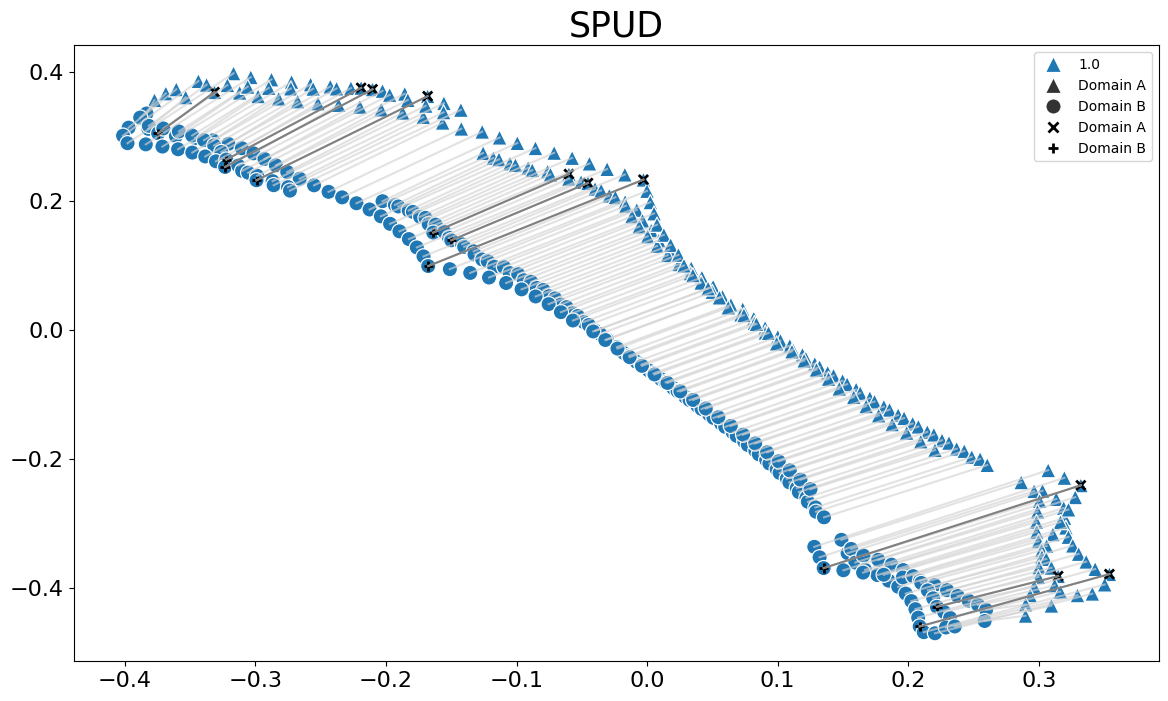

C:\Users\03bud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


RF score on full embedding: None
Cross Embedding score: None
Fraction of Samples Closest to thier Match: 0.0


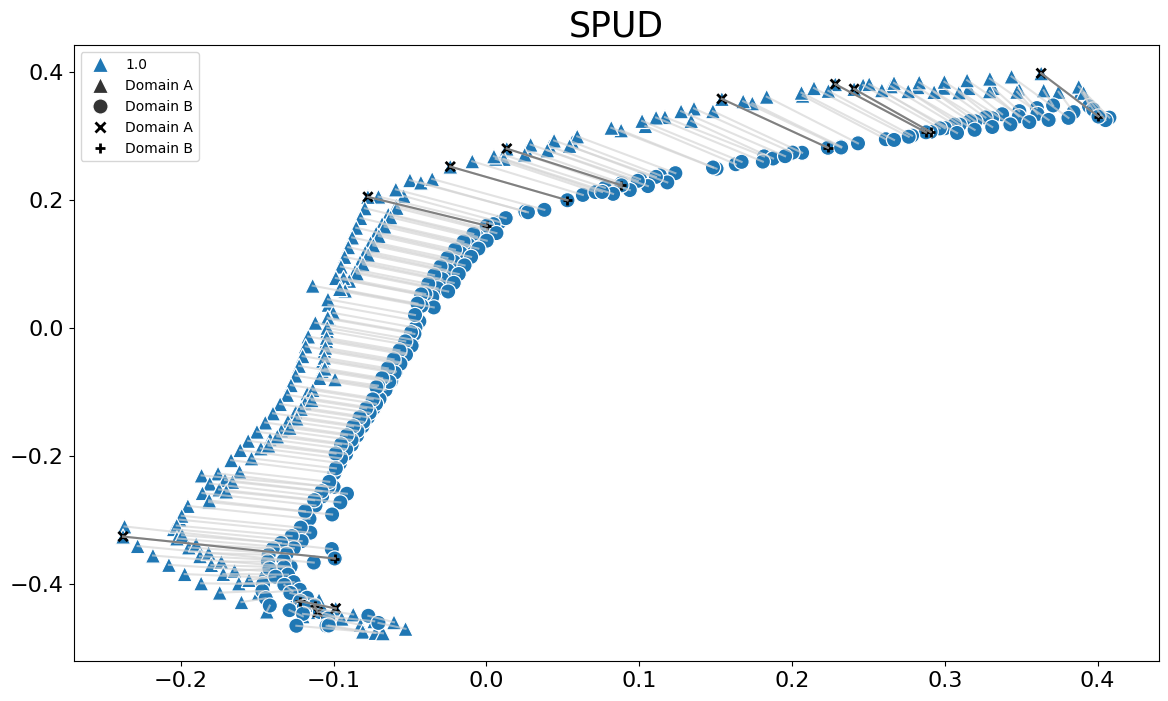

C:\Users\03bud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mashspud\MASH.py:331: RuntimeWarning: invalid value encountered in divide
  return matrix / row_sums[:, np.newaxis]
C:\Users\03bud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


Cross Embedding score: None
Fraction of Samples Closest to thier Match: 0.06355000000000001
RF score trained on full Embedding: None


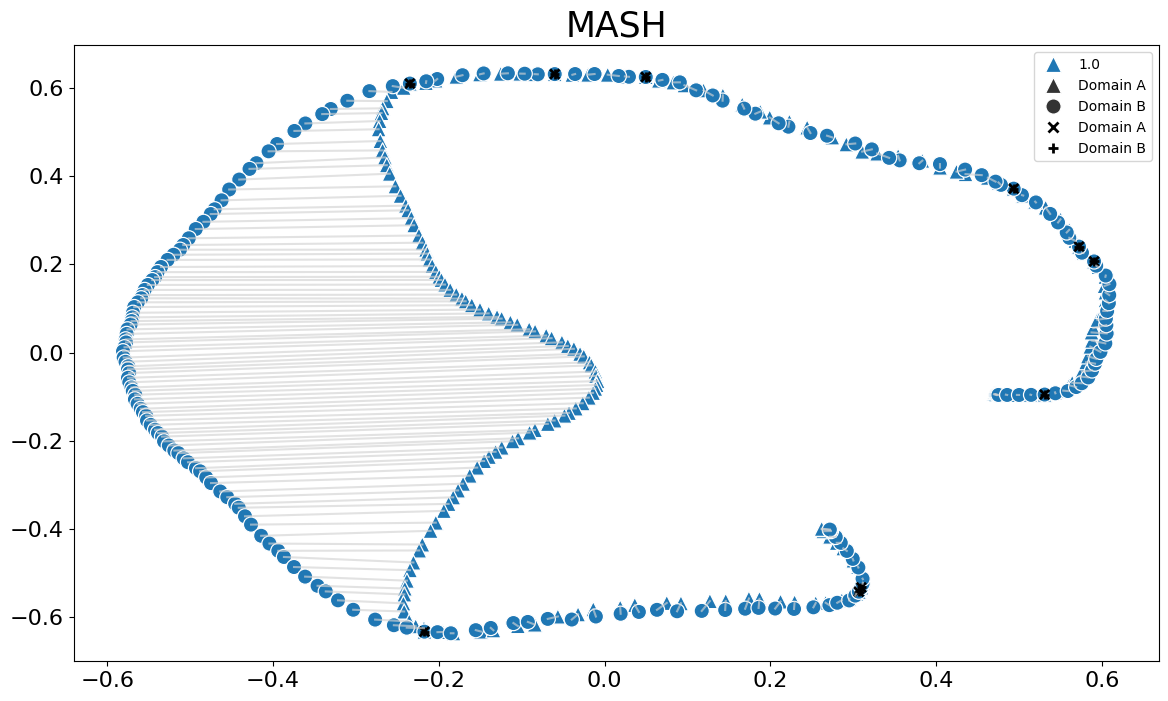

C:\Users\03bud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mashspud\MASH.py:331: RuntimeWarning: invalid value encountered in divide
  return matrix / row_sums[:, np.newaxis]
C:\Users\03bud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


Cross Embedding score: None
Fraction of Samples Closest to thier Match: 0.0727
RF score trained on full Embedding: None


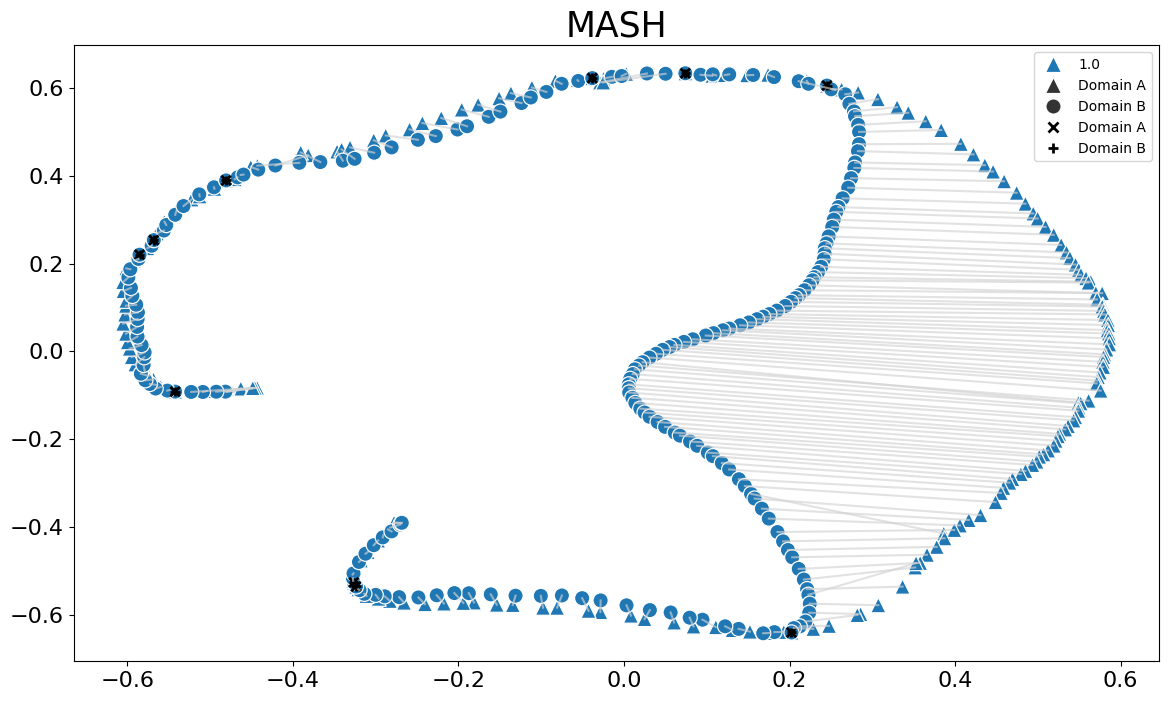

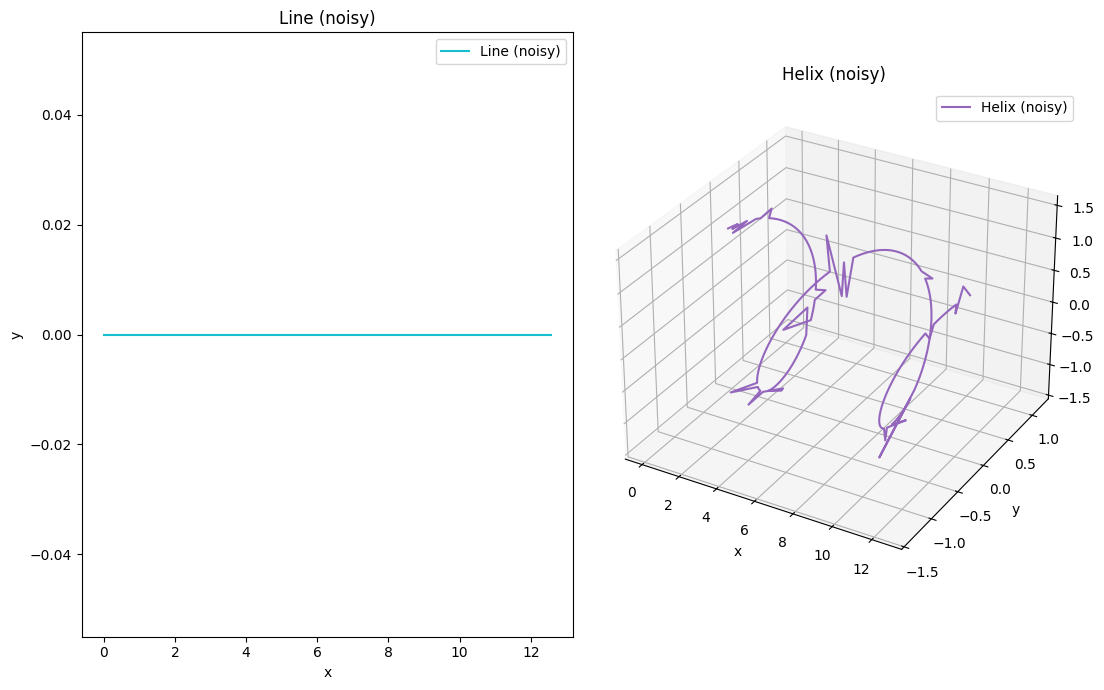

In [349]:

#Generates the data set
line, helix = generate_line_and_helix(200)

line_noisy, helix_noisy,noise_points = generate_line_and_helix_with_noise(200, noise_percentage=0.10, noise_scale=0.3)

training=helix
training_line=line
testing=helix_noisy
testing_line=line_noisy
anchors = create_anchors(len(helix))[:10]

spud_helix = SPUD()
spud_helix.fit(training.to_numpy(), training_line.to_numpy(), anchors)
spud_helix.plot_emb(labels=None)
spud_noisy = SPUD()
spud_noisy.fit(testing.to_numpy(), testing_line.to_numpy(), anchors)
spud_noisy.plot_emb(labels=None)
mash_helix = MASH()
mash_helix.fit(training.to_numpy(), training_line.to_numpy(), anchors)
mash_helix.plot_emb(labels=None)
mash_noisy = MASH()
mash_noisy.fit(testing.to_numpy(), testing_line.to_numpy(), anchors)
mash_noisy.plot_emb(labels=None)
# print(type(mash_helix))

fig = plt.figure(figsize=(11, 7))
ax1 = fig.add_subplot(121)
ax1.plot(line_noisy['x'], line_noisy['y'], label='Line (noisy)', color='tab:cyan')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Line (noisy)')
ax1.legend()
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(helix_noisy['x'], helix_noisy['y'], helix_noisy['z'], label='Helix (noisy)', color='tab:purple')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Helix (noisy)')
ax2.legend()
plt.tight_layout()
plt.show()

In [350]:
# Fitting the auto encoders.
AutoEncA = GRAEAnchor(lam=100, anchor_lam=100, relax=True, n_components = 2)
AutoEncA.fit(training.to_numpy(), spud_helix.emb[:len(training)], anchors)
AutoEncB = GRAEAnchor(lam=100, anchor_lam=100, relax=True, n_components = 2)
AutoEncB.fit(training_line.to_numpy(), spud_helix.emb[len(training_line):], anchors)
AutoEncA_m = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEncA_m.fit(training.to_numpy(), mash_helix.emb[len(training):], anchors)
AutoEncB_m = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEncB_m.fit(training_line.to_numpy(), mash_helix.emb[len(training):], anchors)
AutoEnc_snh = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
# Noisy stuff starts here.
AutoEnc_snh.fit(testing.to_numpy(), spud_noisy.emb[:len(testing)], anchors)
AutoEnc_snl = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEnc_snl.fit(testing_line.to_numpy(), spud_noisy.emb[len(testing):], anchors)
AutoEnc_mnh = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEnc_mnh.fit(testing.to_numpy(), mash_noisy.emb[:len(testing)], anchors)
AutoEnc_mnl = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEnc_mnl.fit(testing_line.to_numpy(), mash_noisy.emb[:len(testing_line)], anchors)

In [351]:
# # This generates the scores for the encoders.  Currently I only have the noisy helix scores.
# Note:  When running the scores remember to put the list that you trained the values in the score function.
# Also for reference:  A and B are SPUDs with training data set; A is the helix, B is the line.  A and B with _m are MASHs with training data A and B are the same.
# _mn and _sn are with the noisy data set mn is mash and sn is spud.  The h and l indicate helix or line.  
# print(AutoEncA.score(training.to_numpy())[1])
# print(AutoEncB.score(training_line.to_numpy())[1])
# print(AutoEncA_m.score(training.to_numpy())[1])
# print(AutoEncB_m.score(training_line.to_numpy())[1])
# print("These are probably more relevant")
print(AutoEnc_snh.score(training.to_numpy())[1])
print(AutoEnc_snl.score(training_line.to_numpy())[1])
print(AutoEnc_mnh.score(testing.to_numpy())[1])
print(AutoEnc_mnl.score(testing_line.to_numpy())[1])
print(type(AutoEnc_mnh))

{'MSE': 0.273431056670792, 'transform_time': 0.007007122039794922, 'rec_time': 0.005517244338989258}
{'MSE': 0.006086735906003545, 'transform_time': 0.004513978958129883, 'rec_time': 0.003999471664428711}
{'MSE': 0.2279085332694716, 'transform_time': 0.005512237548828125, 'rec_time': 0.0055277347564697266}
{'MSE': 0.25850329217114854, 'transform_time': 0.0051457881927490234, 'rec_time': 0.0039958953857421875}
<class 'AutoEncoders.GRAEAnchor'>


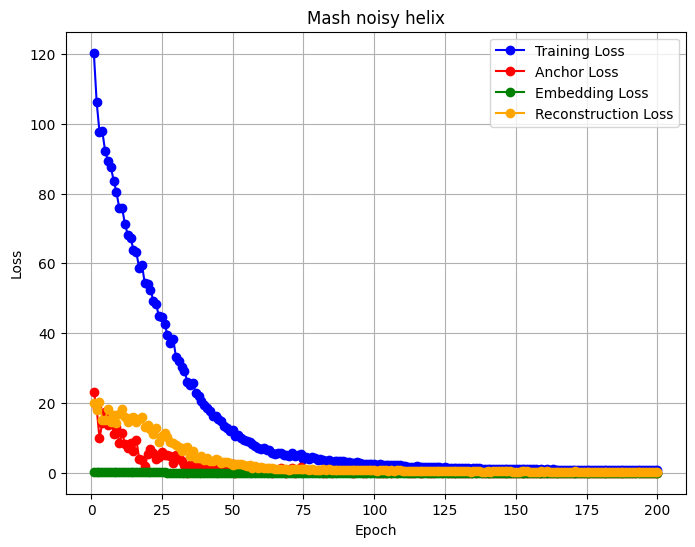

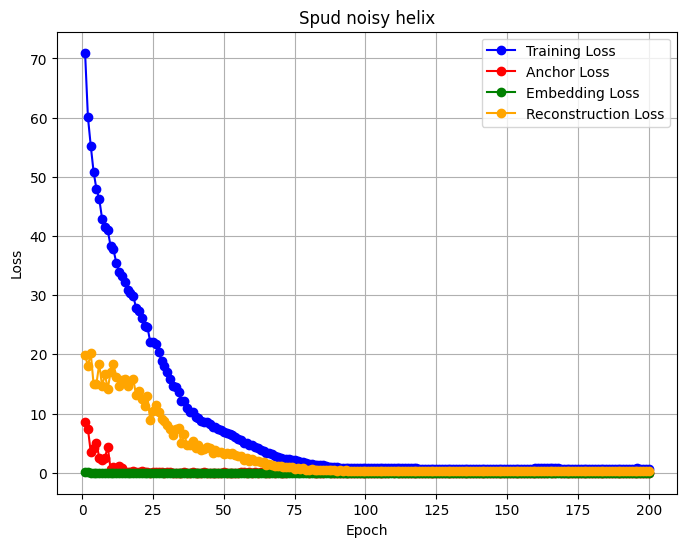

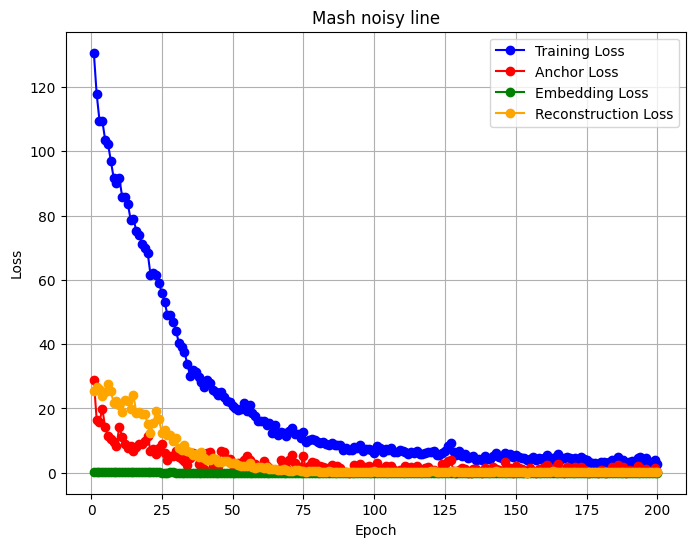

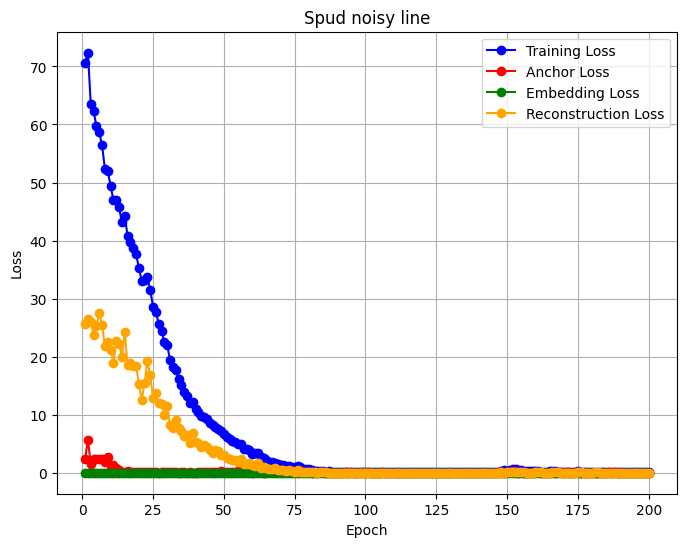

In [352]:
# Generate the plot loss functions
AutoEnc_mnh.plot_loss(Title="Mash noisy helix")
AutoEnc_snh.plot_loss(Title="Spud noisy helix")
AutoEnc_mnl.plot_loss(Title="Mash noisy line")
AutoEnc_snl.plot_loss(Title="Spud noisy line")

Alright, I've run the code a few times and there appears to be some consistancy.  The obvious one is that the non noisy helix and line don't change, values stay consistant there.  There is a bit of fluxuation in the noisy helix, but the noisy line doesn't change as far as I can tell.  The fluxuation is minimal in the helix, but there should be some things we may be able to do tomorrow.

In [353]:
# Transformations and inverse transformations for noisy helix
spud_helix_encoded=AutoEnc_snh.transform(helix_noisy.values)
# Save as variable and then run inverse_transform.
# print(len(spud_helix_encoded))
mash_helix_encoded=AutoEnc_mnh.transform(helix_noisy.values)
# print(type(mash_helix_encoded))
# print(mash_helix_encoded)
inverter_spud=AutoEnc_snh.inverse_transform(spud_helix_encoded)
# print(inverter_spud)
inverter_mash=AutoEnc_mnh.inverse_transform(mash_helix_encoded)

mash_line_encoded=AutoEnc_mnl.transform(line_noisy.values)
inverter_line=AutoEnc_mnl.inverse_transform(mash_line_encoded)
spud_line_encoder=AutoEnc_snl.transform(line_noisy.values)
spud_line_inverter=AutoEnc_snl.inverse_transform(spud_line_encoder)

print(mash_helix_encoded.shape[1])

# [[x, y, z], [x,y,z]]

2


In [354]:
# Find the quantiles of the helix.  50 and 90 percents.
mash_50=np.quantile(mash_helix_encoded, 0.5, axis=0)
mash_50_abs=np.quantile(abs(mash_helix_encoded), 0.5, axis=0)
spud_50=np.quantile(spud_helix_encoded, 0.5, axis=0)
spud_50_abs=np.quantile(abs(spud_helix_encoded), 0.5, axis=0)
mash_90=np.quantile(mash_helix_encoded, 0.9, axis=0)
mash_90_abs=np.quantile(abs(mash_helix_encoded), 0.9, axis=0)
spud_90=np.quantile(spud_helix_encoded, 0.9, axis=0)
spud_90_abs=np.quantile(abs(spud_helix_encoded), 0.9, axis=0)
print(spud_90)


[0.27907905 0.37512848]


In [355]:
# This seperates the x, y, and z values for the helix.  It also takes the values out for the mash and spud inverters.  More details bellow

# These two lists hold the difference between the original(noisy helix) and the reconstructed helix(either mash or spud), both as abs 
difference_mash=[]
difference_spud=[]

#Okay these next few are interesting and may not make the most sense.  Here's the break down.

orgin=[] #This is the noizy helix
changes=[] #This is only used in the mash version, but what it's doing is taking the inverter mash value the for loop is currently at and adding it here.
clean=[] # This is the clean helix with no noise to it and is just a compiled list.
noise_x=[] # X values for the noisy helix
noise_y=[] # Y values for the noisy helix
noise_z=[] # Z values for the noisy helix

#Mash values
mash_inverter_x=[] # X Values for the mash inverter
mash_inverter_y=[] # Y Values for the mash inverter
mash_inverter_z=[] # Z Values for the mash inverter

#Spud values
spud_inverter_x=[] # X Values for the spud inverter
spud_inverter_y=[] # Y Values for the spud inverter
spud_inverter_z=[] # Z Values for the spud inverter

#Sanity check, let's make sure the shape is consistant.
print(inverter_mash.shape[1])
print(helix_noisy.iloc[0,0])
for x in range(len(helix_noisy)):
    for y in range(inverter_mash.shape[1]):
        original=helix_noisy.iloc[x, y]
        orgin.append(original)
        
        reconstructed=inverter_mash[x][y]        
        changes.append(reconstructed)

        pristine=helix.iloc[x,y]
        clean.append(pristine)

        dif=abs(original)-abs(reconstructed)
        difference_mash.append(dif)
        # Putting the values of the inverter in the corresponding spots x, y, and z
        if y == 0:
            noise_x.append(original)
            mash_inverter_x.append(reconstructed)
        elif y == 1:
            noise_y.append(original)
            mash_inverter_y.append(reconstructed)
        elif y == 2:
            noise_z.append(original)
            mash_inverter_z.append(reconstructed)

for x in range(len(helix_noisy)):
    for y in range(inverter_spud.shape[1]):
        original=helix_noisy.iloc[x,y]
        reconstructed=inverter_spud[x][y]
        dif=abs(original)-abs(reconstructed)

        difference_spud.append(dif)
        if y == 0:
            spud_inverter_x.append(reconstructed)
        elif y == 1:
            spud_inverter_y.append(reconstructed)
        elif y == 2:
            spud_inverter_z.append(reconstructed)

print(len(difference_mash))

3
0.0
600


# Not as useful stuff.
The stuff bellow doesn't work as well as I had hoped.  Not sure it will be useful or not, but we'll keep it around any way.

(200, 3)
(200, 3)


Text(0.5, 1.0, 'Mash Reconstructed Z')

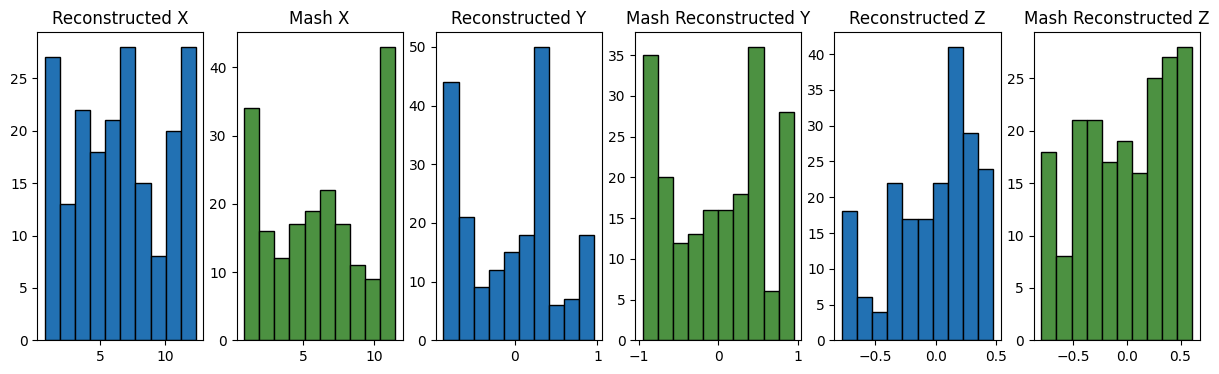

In [356]:
# This is just a bunch of histogram charts that don't do nearly what I thought they would.

inverter_py=np.array(mash_inverter_x)
print(inverter_mash.shape)
print(helix_noisy.shape)
checking=AutoEnc_mnh.reconstruct(inverter_mash)
# Checking might be the same as mash_helix_encoded Find a way to check it after lunch.

checking_x=[]
checking_y=[]
checking_z=[]

for x in range (len(checking)):
    for y in range(checking.shape[1]):
        adding_in=checking[x,y]
        if y == 0:
            checking_x.append(adding_in)
        elif y == 1:
            checking_y.append(adding_in)
        elif y == 2:
            checking_z.append(adding_in)

fig, axes = plt.subplots(1,6, figsize=(15,4))

axes[0].hist(checking_x, color="#2271B3", edgecolor="black")
axes[0].set_title("Reconstructed X")

axes[1].hist(mash_inverter_x, color="#4C9141", edgecolor="black")
axes[1].set_title("Mash X")

axes[2].hist(checking_y, color="#2271B3", edgecolor="black")
axes[2].set_title("Reconstructed Y")

axes[3].hist(mash_inverter_y, color="#4C9141", edgecolor="black")
axes[3].set_title("Mash Reconstructed Y")

axes[4].hist(checking_z, color="#2271B3", edgecolor="black")
axes[4].set_title("Reconstructed Z")

axes[5].hist(mash_inverter_z, color="#4C9141", edgecolor="black")
axes[5].set_title("Mash Reconstructed Z")

# 3D graph of helix data.  Compare original to reconstruct.  Historgram of reconstruction error, SE.  See if there are clear points to remove.  Plot per point?

(200, 3)
(200, 3)


Text(0.5, 1.0, 'Mash Reconstructed Z')

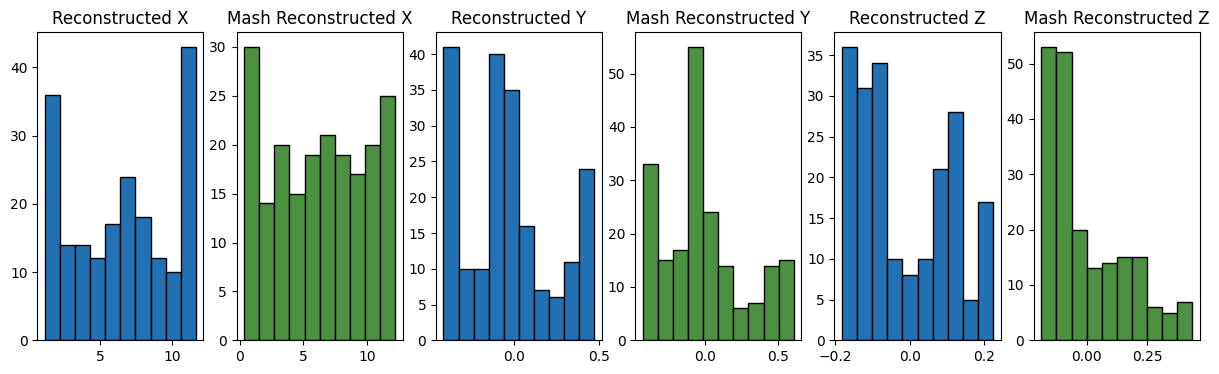

In [357]:
inverter_py=np.array(spud_inverter_x)
print(inverter_mash.shape)
print(helix_noisy.shape)
checking=AutoEnc_snh.reconstruct(inverter_mash)
# Checking might be the same as mash_helix_encoded Find a way to check it after lunch.

checking_x=[]
checking_y=[]
checking_z=[]

for x in range (len(checking)):
    for y in range(checking.shape[1]):
        adding_in=checking[x,y]
        if y == 0:
            checking_x.append(adding_in)
        elif y == 1:
            checking_y.append(adding_in)
        elif y == 2:
            checking_z.append(adding_in)

fig, axes = plt.subplots(1,6, figsize=(15,4))

axes[0].hist(checking_x, color="#2271B3", edgecolor="black")
axes[0].set_title("Reconstructed X")

axes[1].hist(spud_inverter_x, color="#4C9141", edgecolor="black")
axes[1].set_title("Mash Reconstructed X")

axes[2].hist(checking_y, color="#2271B3", edgecolor="black")
axes[2].set_title("Reconstructed Y")

axes[3].hist(spud_inverter_y, color="#4C9141", edgecolor="black")
axes[3].set_title("Mash Reconstructed Y")

axes[4].hist(checking_z, color="#2271B3", edgecolor="black")
axes[4].set_title("Reconstructed Z")

axes[5].hist(spud_inverter_z, color="#4C9141", edgecolor="black")
axes[5].set_title("Mash Reconstructed Z")

200 200 200 200 200 200


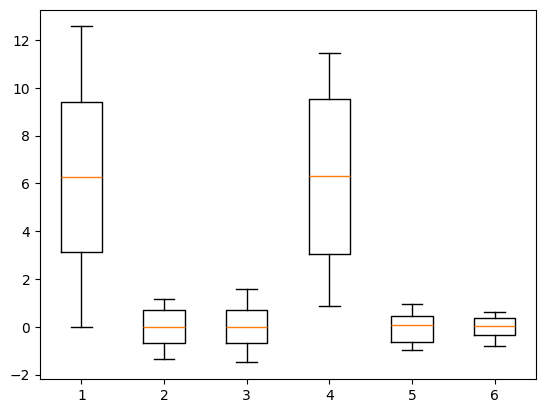

In [358]:
print(len(mash_inverter_x), len(mash_inverter_y), len(mash_inverter_z), len(noise_x), len(noise_y), len(noise_z))
plots=[noise_x, noise_y, noise_z, mash_inverter_x, mash_inverter_y, mash_inverter_z]
plt.boxplot(plots)
plt.show()

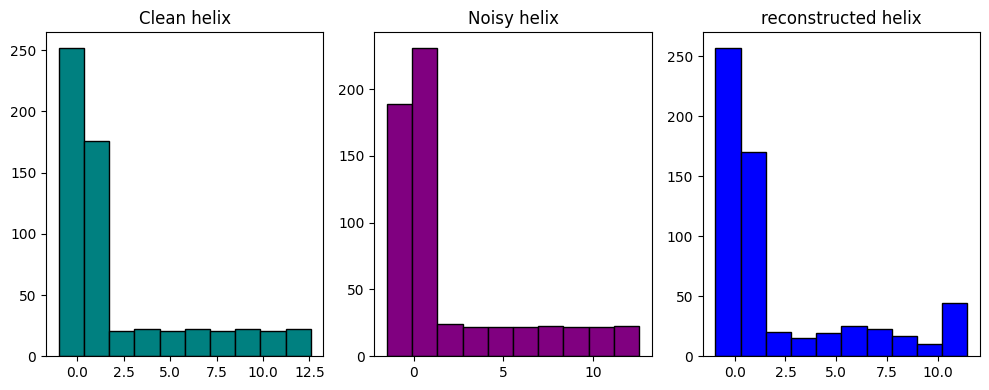

In [359]:
#Making a histogram chart

difference_mash=np.array(difference_mash)

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

axes[0].hist(clean, color="teal", edgecolor="black")
axes[0].set_title("Clean helix")

axes[1].hist(orgin, color="purple", edgecolor="black")
axes[1].set_title("Noisy helix")

axes[2].hist(changes, color="blue", edgecolor="black")
axes[2].set_title("reconstructed helix")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Mash Reconstructed Z')

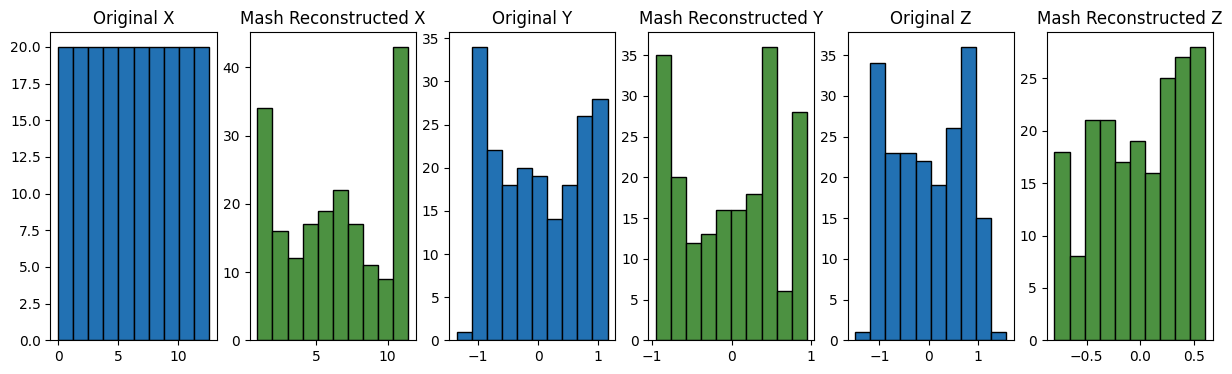

In [360]:
fig, axes = plt.subplots(1,6, figsize=(15,4))

axes[0].hist(noise_x, color="#2271B3", edgecolor="black")
axes[0].set_title("Original X")

axes[1].hist(mash_inverter_x, color="#4C9141", edgecolor="black")
axes[1].set_title("Mash Reconstructed X")

axes[2].hist(noise_y, color="#2271B3", edgecolor="black")
axes[2].set_title("Original Y")

axes[3].hist(mash_inverter_y, color="#4C9141", edgecolor="black")
axes[3].set_title("Mash Reconstructed Y")

axes[4].hist(noise_z, color="#2271B3", edgecolor="black")
axes[4].set_title("Original Z")

axes[5].hist(mash_inverter_z, color="#4C9141", edgecolor="black")
axes[5].set_title("Mash Reconstructed Z")

Text(0.5, 1.0, 'Spud Reconstructed Z')

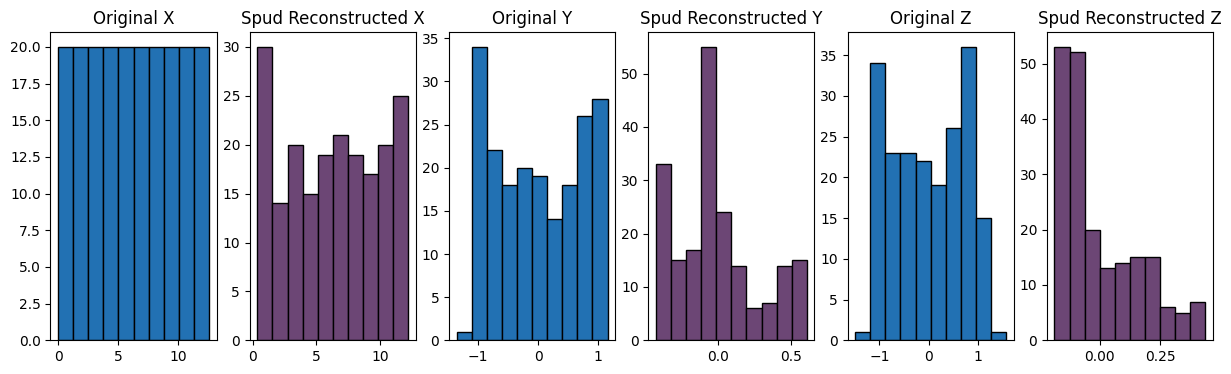

In [361]:
fig, axes = plt.subplots(1,6, figsize=(15,4))

axes[0].hist(noise_x, color="#2271B3", edgecolor="black")
axes[0].set_title("Original X")

axes[1].hist(spud_inverter_x, color="#6C4675", edgecolor="black")
axes[1].set_title("Spud Reconstructed X")

axes[2].hist(noise_y, color="#2271B3", edgecolor="black")
axes[2].set_title("Original Y")

axes[3].hist(spud_inverter_y, color="#6C4675", edgecolor="black")
axes[3].set_title("Spud Reconstructed Y")

axes[4].hist(noise_z, color="#2271B3", edgecolor="black")
axes[4].set_title("Original Z")

axes[5].hist(spud_inverter_z, color="#6C4675", edgecolor="black")
axes[5].set_title("Spud Reconstructed Z")

Text(0.5, 1.0, 'Spud Reconstructed Z')

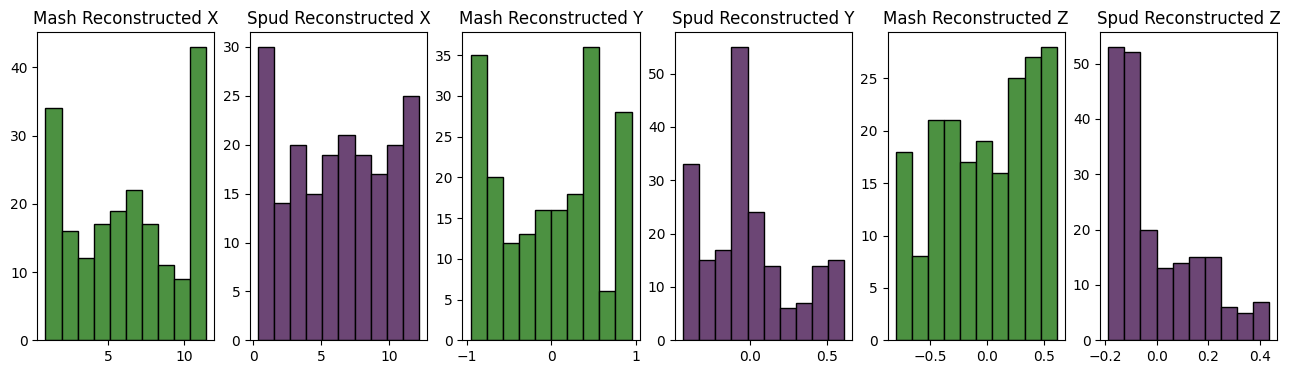

In [362]:
fig, axes = plt.subplots(1,6, figsize=(16,4))

axes[0].hist(mash_inverter_x, color="#4C9141", edgecolor="black")
axes[0].set_title("Mash Reconstructed X")

axes[1].hist(spud_inverter_x, color="#6C4675", edgecolor="black")
axes[1].set_title("Spud Reconstructed X")

axes[2].hist(mash_inverter_y, color="#4C9141", edgecolor="black")
axes[2].set_title("Mash Reconstructed Y")

axes[3].hist(spud_inverter_y, color="#6C4675", edgecolor="black")
axes[3].set_title("Spud Reconstructed Y")

axes[4].hist(mash_inverter_z, color="#4C9141", edgecolor="black")
axes[4].set_title("Mash Reconstructed Z")

axes[5].hist(spud_inverter_z, color="#6C4675", edgecolor="black")
axes[5].set_title("Spud Reconstructed Z")

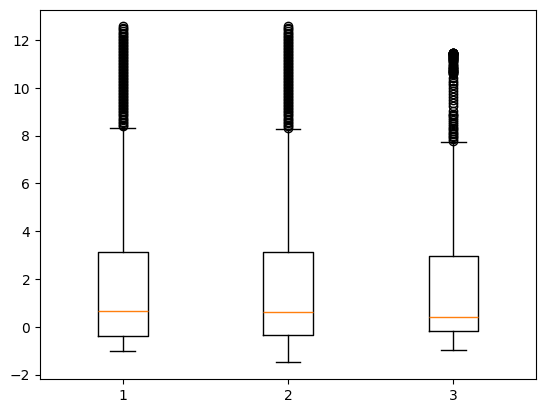

In [363]:
plots=[clean, orgin, changes]
plt.boxplot(plots)
plt.show()

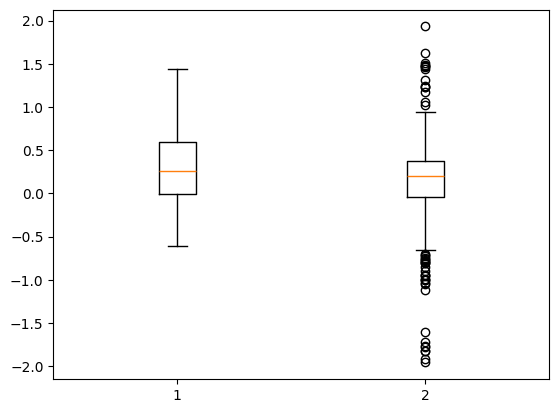

In [364]:
plots=[difference_spud, difference_mash]
plt.boxplot(plots)
plt.show()

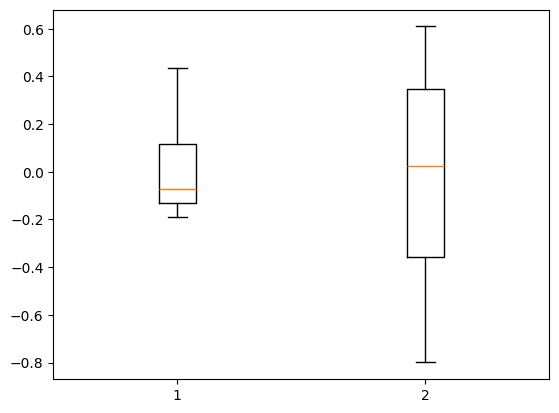

In [365]:
plots=[spud_inverter_z, mash_inverter_z]
plt.boxplot(plots)
plt.show()

In [366]:
for x in range(len(orgin)):
    if orgin[x] >=8:
        print(orgin[x])

8.019744060420175
8.082891651447106
8.146039242474037
8.209186833500967
8.272334424527898
8.335482015554827
8.398629606581759
8.46177719760869
8.52492478863562
8.58807237966255
8.65121997068948
8.714367561716411
8.777515152743343
8.840662743770272
8.903810334797203
8.966957925824133
9.030105516851064
9.093253107877995
9.156400698904925
9.219548289931856
9.282695880958785
9.345843471985717
9.408991063012646
9.472138654039577
9.535286245066509
9.598433836093438
9.66158142712037
9.724729018147299
9.78787660917423
9.851024200201161
9.91417179122809
9.977319382255022
10.040466973281951
10.103614564308883
10.166762155335814
10.229909746362743
10.293057337389675
10.356204928416604
10.419352519443535
10.482500110470466
10.545647701497396
10.608795292524327
10.671942883551257
10.735090474578188
10.79823806560512
10.861385656632049
10.92453324765898
10.98768083868591
11.05082842971284
11.11397602073977
11.177123611766701
11.240271202793632
11.303418793820562
11.366566384847493
11.429713975874423

In [367]:
global u
u=0
global o
o=0
for x in range(len(difference_mash)):
    if difference_mash[x]<=-2:
        u+=1
        print(x)
    elif difference_mash[x]>=2:
        o+=1
        print(x)

print(u)
print(o)
print(anchors)
#We have a few values over 2 sitting in indices 265 and 277 and a few under -2 indices at 9 and 307
# print(helix_noisy.iloc[88])
# print(helix_noisy.iloc[92])
# print(helix_noisy.iloc[3])
# print(helix_noisy.iloc[102])
# print(inverter_mash[88])
# print(inverter_mash[92])
# print(inverter_mash[3])
# print(inverter_mash[102])

0
0
[[163 163]
 [ 28  28]
 [  6   6]
 [189 189]
 [ 70  70]
 [ 62  62]
 [ 57  57]
 [ 35  35]
 [188 188]
 [ 26  26]]


# This stuff is more useful
We still have more stuff we'll need to do, but it's just nice to have things compiled.

## Setting up data points.
The code blocks bellow set up various data points that we'll be using later in graphs 

In [368]:

# print(anchors.shape)
anchor_value=[] #Anchor value in the noisy helix
anchor_in_recon=[] #Anchor values in the reconstructed helix
print(type(anchors))
for x in range(len(anchors)):
    adding_in=anchors[x][0]
    # print(adding_in)
    anchor_value.append(adding_in)

# print(anchor_value)
for x in range(len(anchor_value)):
    check=anchor_value[x]*3
    anchor_in_recon.append(check)


<class 'numpy.ndarray'>


In [369]:
#Okay this one takes a look at the anchors inside the mash and spud encoded values and takes and checks the difference between the two.

mash_differ=[]
spud_differ=[]

for x in range(len(anchors)):
    mash=inverter_mash[anchors[x][0]] #Anchor value in mash
    spud=inverter_spud[anchors[x][0]] #Anchor value in spud
    core=helix_noisy.iloc[anchors[x][0]] #Anchor value in the original helix
    # print(mash)
    dif_mash=mash-core
    dif_spud=spud-core
    mash_differ.append(dif_mash)
    spud_differ.append(dif_spud)

In [370]:
# The purpose of these for loops are to count the number of values over 1 inside the difference for spud and mash; which should indicate the outlier values.

global t
t=0
for x in range(len(difference_spud)):
    if difference_spud[x]>=1:
        t+=1
        # print(difference_spud[x])
print(t)

global p
p=0
for x in range(len(difference_mash)):
    if difference_mash[x]>=1:
        p+=1
        # print(difference_mash[x])
print(p)

5
15


In [371]:
#There was a purpose behind this code, but I forgot what it was.  Perhpas it will come back to me at a later time.

global u
u=0
for x in range(len(spud_inverter_x)):
    if spud_inverter_x[x]>=1:
        u+=1
    if spud_inverter_y[x]>=1:
        u+=1
    if spud_inverter_z[x]>=1:
        u+=1
print(u)

global c
c=0
for x in range(len(mash_inverter_x)):
    if mash_inverter_x[x]>=1:
        c+=1
    if mash_inverter_y[x]>=1:
        c+=1
    if mash_inverter_z[x]>=1:
        c+=1
print(c)

global o
o=0
for x in range(len(noise_x)):
    if noise_x[x]>=1:
        o+=1
    if noise_y[x]>=1:
        o+=1
    if noise_z[x]>=1:
        o+=1
print(o)


184
194
190


In [372]:
#There's probably a better way to do this, but we should be able to brute force it
#                       MASH
print(len(mash_inverter_x))
new_x=[]
new_y=[]
new_z=[]
spud_x=[]
spud_y=[]
spud_z=[]
index_mash=[]
index_spud=[]
for x in range(len(difference_mash)):
    if difference_mash[x]>=0.9:
        r=(round(x/3))-1
        new_x.append(mash_inverter_x[r])
        new_y.append(mash_inverter_y[r])
        new_z.append(mash_inverter_z[r])
        index_mash.append(x)

for x in range(len(difference_spud)):
    if difference_spud[x]>=1:
        r=(round(x/3)-1)
        spud_x.append(spud_inverter_x[r])
        spud_y.append(spud_inverter_y[r])
        spud_z.append(spud_inverter_z[r])
        index_spud.append(x)


200


In [373]:
print(noise_points)
noise=[]
# print(helix_noisy.iloc[10])
for x in range(len(noise_points)):
    point=noise_points[x]
    noise_values=helix_noisy.iloc[point]
    noise.append(noise_values)
print(len(noise))
print(noise[0])

index_x=[]
index_y=[]
index_z=[]

for x in range(len(noise)):
    for y in range(3):
        value=noise[x][y]
        if y==0:
            index_x.append(value)
        elif y==1:
            index_y.append(value)
        elif y==2:
            index_z.append(value)

print(len(index_x), len(index_y), len(index_z))

[ 61 100 190 198  33  68 157  60  40   8 146   3   5 160  39 121  98  97
  63 197]
20
x    3.852003
y   -0.326450
z   -0.956430
Name: 61, dtype: float64
20 20 20


C:\Users\03bud\AppData\Local\Temp\ipykernel_27064\4102067100.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value=noise[x][y]


In [374]:
mash_noise_x=[]
mash_noise_y=[]
spud_noise_x=[]
spud_noise_y=[]
for x in range(len(noise_points)):
    mash_noise_x.append(mash_inverter_x[noise_points[x]])
    mash_noise_y.append(mash_inverter_y[noise_points[x]])
    spud_noise_x.append(spud_inverter_x[noise_points[x]])
    spud_noise_y.append(spud_inverter_y[noise_points[x]])


In [375]:
#This figures out what we've gotten right in the predictions for noise points.
similar= set(mash_noise_y) & set(new_y)
print(len(similar))
print(similar)

5
{np.float32(-0.030020565), np.float32(0.17696568), np.float32(-0.74680406), np.float32(-0.8859473), np.float32(-0.8597988)}


In [376]:
# Noise and anchors are saved as values  Let's see what we can find.

overlap=set(anchor_value)& set(noise_points)
print(len(overlap))
print(overlap)

0
set()


In [377]:
anchor_points=[]
for x in range(len(anchors)):
    anchor_points.append(anchors[x,0])

anchor_x=[]
anchor_y=[]
anchor_z=[]
anchor_mash_x=[]
anchor_mash_y=[]
anchor_mash_z=[]
anchor_spud_x=[]
anchor_spud_y=[]
anchor_spud_z=[]
for x in range(len(anchor_points)):
    val=anchor_points[x]
    anchor_x.append(helix_noisy.iloc[val,0])
    anchor_y.append(helix_noisy.iloc[val,1])
    anchor_z.append(helix_noisy.iloc[val,2])

print(anchor_x[0])

for x in range(len(anchors)):
    val=anchor_points[x]
    anchor_mash_x.append(inverter_mash[val][0])
    anchor_mash_y.append(inverter_mash[val][1])
    anchor_mash_z.append(inverter_mash[val][2])

for x in range(len(anchors)):
    val=anchor_points[x]
    anchor_spud_x.append(inverter_spud[val][0])
    anchor_spud_y.append(inverter_spud[val][1])
    anchor_spud_z.append(inverter_spud[val][2])

10.293057337389675


In [378]:
#Okay The 3D plot isn't as helpful as I was hoping.  The 2D for the Mash has some potential, but we're going to have to find the quantiles graph those.
mash_25=np.quantile(mash_helix_encoded, 0.25, axis=0)
mash_75=np.quantile(mash_helix_encoded, 0.75, axis=0)
print(mash_25, mash_50, mash_75, mash_90)

[-0.3038752  -0.41101742] [ 0.15050648 -0.00924254] [0.5053011 0.3557341] [0.5696144 0.5693538]


In [379]:
#Set up the quantiles

m_50=[]
m_75=[]
m_90=[]

encode_x=[]
encode_y=[]

for x in range(len(mash_helix_encoded)):
    for y in range(mash_helix_encoded.shape[1]):
        if y==0:
            encode_x.append(mash_helix_encoded[x][y])
        elif y == 1:
            encode_y.append(mash_helix_encoded[x][y])
print(type(mash_25))

<class 'numpy.ndarray'>


In [380]:
m_25=[]
m_25x=[]
m_25y=[]
for x in range(len(mash_helix_encoded)):
    if mash_helix_encoded[x][0]<=mash_25[0] and mash_helix_encoded[x][1]<=mash_25[1]:
        m_25.append(mash_helix_encoded[x])

print(mash_25)
print(len(m_25))
print(m_25)

for x in range(len(m_25)):
    m_25x.append(m_25[x][0])
    m_25y.append(m_25[x][1])
print(len(m_25x))
print(len(m_25y))

[-0.3038752  -0.41101742]
7
[array([-0.3063149 , -0.53683746], dtype=float32), array([-0.31765962, -0.5351472 ], dtype=float32), array([-0.3262899 , -0.53311944], dtype=float32), array([-0.3294558 , -0.52966416], dtype=float32), array([-0.30935207, -0.5685554 ], dtype=float32), array([-0.32065964, -0.5247675 ], dtype=float32), array([-0.3118013, -0.522546 ], dtype=float32)]
7
7


In [381]:
global y
global x
x=0
y=0
# print(len(mash_helix_encoded))
# print(mash_helix_encoded.shape)
for row in range(len(encode_x)):
    if encode_x[row]>=0.6:
        print(encode_x[row])
        print(row)
# print(encode_x)
for row in range(len(encode_y)):
    if encode_y[row]>=0.64:
        print(encode_y[row])
        print(row)

print(encode_x[65])
print(encode_y[122])
print(type(helix_noisy))
print(helix_noisy.shape)

0.6414872
62
0.69256926
63
0.67466825
68
0.14217725
-0.1116713
<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [382]:
#We're going to try for the MSE and see what we can come up with.
mse=[]
for x in range(helix_noisy.shape[0]):
    for y in range(helix_noisy.shape[1]):
        helix_val=helix_noisy.iloc[x][y]
        encode_val=inverter_mash[x][y]
        squared_error=helix_val-encode_val
        mse.append(squared_error)
global w
w=0
location=[]
for x in range(len(mse)):
    if mse[x]<=0.5 and mse[x]>=0.25:
        w+=1
        location.append(x)
        # print(mse[x])
print(w)
print(location)


117
[2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 63, 66, 69, 91, 94, 97, 100, 103, 106, 109, 112, 115, 121, 124, 127, 132, 135, 138, 141, 181, 184, 266, 269, 272, 275, 278, 281, 284, 287, 290, 329, 330, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 357, 358, 360, 361, 363, 366, 367, 369, 372, 375, 378, 381, 384, 385, 387, 388, 390, 391, 393, 394, 396, 397, 399, 400, 402, 403, 405, 406, 408, 409, 411, 412, 414, 417, 420, 423, 438, 546, 549, 551, 554, 557, 560, 563, 566, 569, 571, 572, 574, 577, 580]


C:\Users\03bud\AppData\Local\Temp\ipykernel_27064\529234803.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  helix_val=helix_noisy.iloc[x][y]


In [383]:
print(AutoEnc_mnh.data_shape)
print(type(AutoEnc_mnh))
print(type(inverter_mash))
print(inverter_mash.shape)
print(helix_noisy.shape)
print(helix_noisy.iloc[2])
print(inverter_mash[2])

torch.Size([3])
<class 'AutoEncoders.GRAEAnchor'>
<class 'numpy.ndarray'>
(200, 3)
(200, 3)
x    0.126295
y    0.125960
z    0.992035
Name: 2, dtype: float64
[1.8496451  0.8289087  0.56192404]


In [384]:
#Okay bellow we are removing probably way too many values (60 it should only be 20)  The biggest thing we need to do is check against overlap

In [385]:
window_size=10
above_90=[]
indices=[]
rolling_var=helix_noisy.rolling(window=window_size, center=True).var()
total_variance=rolling_var.sum(axis=1)
hieghst_point=total_variance.idxmax()
noise_val=helix_noisy.iloc[hieghst_point]
print(hieghst_point)
# print(noise_val)
# print(type(difference_mash))

percent_90=np.percentile(difference_mash, 90)
# print(percent_90)
# print(len(difference_mash))
for x in range(len(difference_mash)):
    if difference_mash[x]>=percent_90:
        above_90.append(x)
print(len(above_90))
for x in range(len(above_90)):
    vavlve=round(above_90[x]/3)-1
    indices.append(vavlve)
print(len(indices))
# print(indices[8])
# print(difference_mash[1])
# print(indices)

# anchor_noise= set() & set(new_y)
# print(anchors)
overlap = set(indices) & set(anchor_value)
print(overlap)
print(len(indices))
# print(above_90)

65
60
60
{np.int64(35), np.int64(28), np.int64(26), np.int64(188), np.int64(189)}
60


In [386]:
# This makes sure there isn't anything in the indicies over the points in the helix
for x in range(len(indices)):
    if indices[x]>=200:
        print("Error")
print(max(indices))

#Remove the anchors from the noise points list.  I'm not removing the noisy anchors just yet as that may mess with a few things I don't know how to fix yet.
for x in indices[:]:
    if x in overlap:
        indices.remove(x)

overlap = set(indices) & set(anchor_value)
print(overlap)

199
set()


In [387]:
noisy_array=helix_noisy.to_numpy()
noisy_line=line_noisy.to_numpy()
print(np.shape(noisy_line))
print(line_noisy.shape)

temp_helix=list(noisy_array)
temp_line=list(noisy_line)
print(len(temp_helix))

indices=set(indices)
sort_indices=sorted(indices)
print(len(sort_indices))
print(len(temp_helix))

#For loop removing noise points that aren't anchors
for x in range (len(sort_indices)):
    remove=sort_indices.pop()
    temp_helix.pop(remove)
    temp_line.pop(remove)

ln_helix=np.array(temp_helix)
ln_line=np.array(temp_line)


(200, 2)
(200, 2)
200
49
200


In [388]:
#Adjusting the anchor points
anchor_value=list(anchor_value)
sort_anchors=sorted(anchor_value)
print(sort_anchors)

# check=(sort_anchors[0])
# check=check-1
# print(check)
#Good news here is that pulling the value out of the list doesn't bring the np. with it and we can edit it as normal, it's just going to look funny for a bit.

def mod_anchors(anchors, removal):
    sort_anchors=np.sort(anchors)
    sort_remove=list(removal)
    # print(sort_anchors)
    # print(sort_remove)
    for x in range(len(sort_anchors)):
        for y in range(len(sort_remove)):
            if sort_anchors[x]>=sort_remove[y]:
                sort_anchors[x]=sort_anchors[x]-1
    return(np.sort(sort_anchors))


[np.int64(6), np.int64(26), np.int64(28), np.int64(35), np.int64(57), np.int64(62), np.int64(70), np.int64(163), np.int64(188), np.int64(189)]


In [389]:
print(sort_anchors)
print(sorted(indices))
anchor_repo=(mod_anchors(sort_anchors, indices))
print(anchor_repo)


[np.int64(6), np.int64(26), np.int64(28), np.int64(35), np.int64(57), np.int64(62), np.int64(70), np.int64(163), np.int64(188), np.int64(189)]
[24, 25, 27, 29, 30, 31, 32, 33, 34, 36, 37, 40, 41, 97, 102, 103, 120, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 157, 160, 184, 185, 186, 187, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
[  6  24  26  30  44  49  57 133 153 154]


In [392]:
# Okay the purpose of this block is to check the types of everything we're sending into the .emb function for spud
print(type(spud_helix))
print(type(spud_less_noise))
print(type(training))
print(type(ln_line))
#Okay ln_line is a numpy array we need it to be a pandas data frame.
print(np.shape(ln_line))
print(training.shape)

<class 'mashspud.SPUD.SPUD'>
<class 'mashspud.SPUD.SPUD'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(151, 2)
(200, 3)


In [393]:
print(np.shape(ln_line))
print(np.shape(anchor_repo))
print(anchor_repo)
anchor_repo=anchor_repo.reshape(10,1)
print(anchor_repo)

(151, 2)
(10,)
[  6  24  26  30  44  49  57 133 153 154]
[[  6]
 [ 24]
 [ 26]
 [ 30]
 [ 44]
 [ 49]
 [ 57]
 [133]
 [153]
 [154]]


In [ ]:
print(index_mash)
print(index_spud)
print(len(above_90))
print(len(difference_mash))
print(len(difference_spud))
print(np.shape(difference_mash))
print(above_90)

In [ ]:
window_size=10
above_90=[]
indices=[]
rolling_var=helix_noisy.rolling(window=window_size, center=True).var()
total_variance=rolling_var.sum(axis=1)
hieghst_point=total_variance.idxmax()
noise_val=helix_noisy.iloc[hieghst_point]
print(hieghst_point)
# print(noise_val)
# print(type(difference_mash))

percent_90=np.percentile(difference_mash, 90)
# print(percent_90)
# print(len(difference_mash))
for x in range(len(difference_mash)):
    if difference_mash[x]>=percent_90:
        above_90.append(x)
print(len(above_90))
for x in range(len(above_90)):
    vavlve=round(above_90[x]/3)-1
    indices.append(vavlve)
print(len(indices))
# print(indices[8])
# print(difference_mash[1])
# print(indices)

# anchor_noise= set() & set(new_y)
# print(anchors)
overlap = set(indices) & set(anchor_value)
print(overlap)
print(len(indices))
# print(above_90)

# This is probably where we should pick up from now on, until we figure out what we really need to keep to make the stuff work bellow.

In [395]:
#Just messing around with stuff

removal=[]
noise_index=[]
x_vals=[]
global sanity
sanity=True
for x in range(len(helix_noisy)):
    sanity=True
    for y in range(inverter_mash.shape[1]):
        original=helix_noisy.iloc[x, y]
        
        reconstructed=inverter_mash[x][y]        

        dif=abs(original)-abs(reconstructed)
        if dif<=-1:
            noise_index.append(dif)
            x_vals.append([x])

        if y == 0:
            noise_x.append(original)
            mash_inverter_x.append(reconstructed)
        elif y == 1:
            noise_y.append(original)
            mash_inverter_y.append(reconstructed)
        elif y == 2:
            noise_z.append(original)
            mash_inverter_z.append(reconstructed)

        if sanity:
            if dif>=1 or dif<=-1:
                removal.append(dif)
                sanity=False
print(len(removal))
print(removal)
print(len(noise_index))
print(x_vals)
print(noise)
print(len(helix_noisy))

28
[np.float64(-1.819560170173645), np.float64(-1.7616087928689435), np.float64(-1.723349955733004), np.float64(-1.8209723041286812), np.float64(-1.7825630248693287), np.float64(-1.9577183799330964), np.float64(-1.9128234000664444), np.float64(-1.602148209704797), np.float64(-1.004223692637217), np.float64(-1.113644899675472), np.float64(1.2359712457519576), np.float64(1.0615922173189685), np.float64(1.237599413986299), np.float64(-1.0462037176030012), np.float64(-1.0375757798963843), np.float64(-1.0039110303611523), np.float64(1.0183811687645221), np.float64(1.1767207153578596), np.float64(1.3128377430302969), np.float64(1.438080068638845), np.float64(1.4625599808327685), np.float64(1.4748357227996411), np.float64(1.4711774742879964), np.float64(1.4829325100781112), np.float64(1.5137896424258415), np.float64(1.2307076802301165), np.float64(1.9318557595382977), np.float64(1.619110711405071)]
13
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [163], [164], [165]]
[x    3.852003
y   -

In [396]:
print(mash_inverter_y[2])
print(noise_y[2])
print(len(spud_inverter_y))
print(len(noise_y))
diff_x=[]
diff_y=[]
diff_z=[]

for x in range(len(spud_inverter_x)):
    x_val=spud_inverter_x[x]
    x_noise=noise_x[x]
    difference=abs(x_noise)-abs(x_val)
    diff_x.append(difference)
    
for x in range(len(spud_inverter_y)):
    y_val=spud_inverter_y[x]
    y_noise=noise_y[x]
    difference=abs(y_noise)-abs(y_val)
    diff_y.append(difference)

for x in range(len(spud_inverter_z)):
    z_val=spud_inverter_z[x]
    z_noise=noise_z[x]
    difference=abs(z_noise)-abs(z_val)
    diff_z.append(difference)


0.8289087
0.12595970506771756
200
400


In [397]:
global rile
global ant
global crim
ant=0
rile=0
crim=0
spud_1=[]
#Ant for y, rile for z, crim is x

for x in range(len(diff_x)):
    if diff_x[x]>=0.95 or diff_x[x]<=-1:
        print(diff_x[x])
        crim+=1
        spud_1.append(x)

for x in range(len(diff_y)):
    if diff_y[x]>=0.95 or diff_y[x]<=-1:
        print(diff_y[x])
        ant+=1
        spud_1.append(x)

for x in range(len(diff_z)):
    if diff_z[x]>=0.95 or diff_z[x]<=-1:
        print(diff_z[x])
        rile+=1
        spud_1.append(x)

print(crim, ant, rile)

#I think we're on to something here.  If we can find the overlay for each index over 1 I think we may be on to something.

1.3434791563114183
0.951094231878138
0.9706821270133026
0.9855965815812202
0.9930084991131558
0.9950976114594574
0.9932498773286556
0.9874726531225616
0.9779651193326004
0.9645925568690784
1.0812633693477829
1.4381005873608157
1.4118863457394575
0.9508686436582424
0.9572135438336058
0.9593037708533095
0.9573571891138659
0.9515688225113905
1.0145290001644547
0.9527075822145135
0.9802625843933261
0 11 10


In [398]:
print(spud_1)
print(noise_points)
spud_set=set(spud_1)
print(spud_set)

[68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 121, 97, 146, 148, 149, 150, 151, 152, 157, 160, 198]
[ 61 100 190 198  33  68 157  60  40   8 146   3   5 160  39 121  98  97
  63 197]
{146, 148, 149, 150, 151, 152, 157, 160, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 198, 97, 121}


In [399]:
diff_x_mash=[]
diff_y_mash=[]
diff_z_mash=[]
mash_1=[]
for x in range(len(spud_inverter_x)):
    x_val=mash_inverter_x[x]
    x_noise=noise_x[x]
    difference=abs(x_noise)-abs(x_val)
    diff_x_mash.append(difference)
    
for x in range(len(spud_inverter_y)):
    y_val=mash_inverter_y[x]
    y_noise=noise_y[x]
    difference=abs(y_noise)-abs(y_val)
    diff_y_mash.append(difference)

for x in range(len(spud_inverter_z)):
    z_val=mash_inverter_z[x]
    z_noise=noise_z[x]
    difference=abs(z_noise)-abs(z_val)
    diff_z_mash.append(difference)

global rile
global ant
global crim
ant=0
rile=0
crim=0
#Ant for y, rile for z, crim is x

for x in range(len(diff_x)):
    if diff_x_mash[x]>=0.95 or diff_x_mash[x]<=-1:
        crim+=1
        mash_1.append(x)

for x in range(len(diff_y)):
    if diff_y_mash[x]>=0.95 or diff_y_mash[x]<=-1:
        ant+=1
        mash_1.append(x)

for x in range(len(diff_z)):
    if diff_z_mash[x]>=0.95 or diff_z_mash[x]<=-1:
        rile+=1
        mash_1.append(x)

print(crim, ant, rile)

26 0 2


In [400]:
print(mash_1)
print(noise_points)
mash_set=set(mash_1)
print(mash_set)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 33, 163, 164, 165, 187, 188, 189, 191, 192, 193, 194, 195, 196, 197, 198, 199, 97, 146]
[ 61 100 190 198  33  68 157  60  40   8 146   3   5 160  39 121  98  97
  63 197]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 146, 33, 163, 164, 165, 187, 188, 189, 191, 192, 193, 194, 195, 196, 197, 198, 199, 97}


In [401]:
mash_overlap = set(mash_set) & set(anchor_value)
spud_overlap = set(spud_set) & set(anchor_value)
# print(mash_overlap)
# print(spud_overlap)
for x in mash_1[:]:
    if x in mash_overlap:
        mash_set.remove(x)

for x in spud_1[:]:
    if x in spud_overlap:
        spud_set.remove(x)

print(mash_set)
print(spud_set)

{0, 1, 2, 3, 4, 5, 7, 8, 9, 146, 33, 164, 165, 187, 191, 192, 193, 194, 195, 196, 197, 198, 199, 97}
{146, 148, 149, 150, 151, 152, 157, 160, 68, 71, 72, 73, 74, 75, 76, 77, 78, 198, 97, 121}


In [402]:
noisy_array=helix_noisy.to_numpy()
noisy_line=line_noisy.to_numpy()
print(np.shape(noisy_line))
print(line_noisy.shape)

mash_set=mash_1
spud_set=spud_1
mash_temp_helix=list(noisy_array)
mash_temp_line=list(noisy_line)
spud_temp_helix=list(noisy_array)
spud_temp_line=list(noisy_line)
mash_list=list(mash_set)
spud_list=list(spud_set)
mash_list=sorted(mash_list)
spud_list=sorted(spud_list)
#For loop removing noise points that aren't anchors
for x in range (len(mash_list)):
    remove=mash_list.pop()
    mash_temp_helix.pop(remove)
    mash_temp_line.pop(remove)

for x in range (len(spud_list)):
    remove=spud_list.pop()
    spud_temp_helix.pop(remove)
    spud_temp_line.pop(remove)

mash_ln_helix=np.array(mash_temp_helix)
mash_ln_line=np.array(mash_temp_line)
spud_ln_helix=np.array(spud_temp_helix)
spud_ln_line=np.array(spud_temp_line)
print(len(mash_list))
print(len(spud_list))

(200, 2)
(200, 2)
0
0


In [403]:
def mod_anchors(anchors, removal):
    sort_anchors=np.sort(anchors)
    sort_remove=list(removal)
    
    for x in range(len(sort_anchors)):
        # print(len(sort_remove))
        for y in range(len(sort_remove)):
            # print("Y for loop")
            if sort_anchors[x]>=sort_remove[y]:
                # print("If block")
                sort_anchors[x]=sort_anchors[x]-1
    return(np.sort(sort_anchors))


In [404]:
mash_reanchor=mod_anchors(sort_anchors,mash_1)
spud_reanchor=mod_anchors(sort_anchors,spud_1)
print(mash_reanchor)
print(spud_reanchor)
print(sort_anchors)

[  2  16  18  25  46  51  59 150 172 173]
[  6  26  28  35  57  62  69 148 168 169]
[np.int64(6), np.int64(26), np.int64(28), np.int64(35), np.int64(57), np.int64(62), np.int64(70), np.int64(163), np.int64(188), np.int64(189)]


(10, 2)
[  6  26  28  35  57  62  69 148 168 169]
151
151
11.934894704089867


C:\Users\03bud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


RF score on full embedding: None
Cross Embedding score: None
Fraction of Samples Closest to thier Match: 0.00037452014606285694


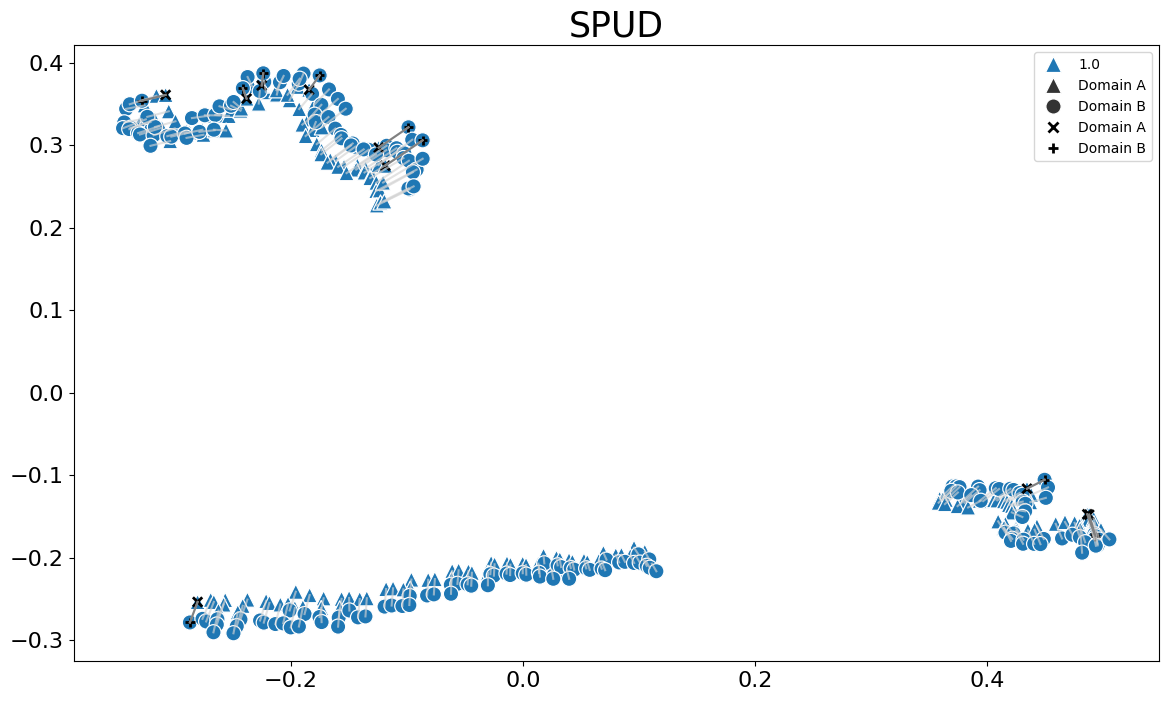

In [406]:
# print(ln_line)
# print(line_noisy)
# print(type(helix_noisy))
# print(type(ln_helix))
# ln_helix_pandas=pd.DataFrame(ln_helix)
# print(type(spud_helix))
# print(spud_helix.emb[:len(training)])
# print(ln_helix.emb[:len(training)])

anchor_fix=np.stack((spud_reanchor, spud_reanchor), axis=1)

spud_helix.fit(training.to_numpy(), training_line.to_numpy(), anchors)
# print(np.shape(ln_helix))
# print(np.shape(ln_line))
# print(np.shape(training))
# print(np.shape(training_line))
# print(np.shape(anchors))
print(np.shape(anchor_fix))
print(anchor_fix[:,0])
print(len(ln_line))
print(len(ln_helix))
print(np.max(ln_helix))
spud_less_noise=SPUD()
spud_less_noise.fit(spud_ln_line, spud_ln_helix, anchor_fix)
spud_less_noise.plot_emb(labels=None)

In [407]:
# AutoEncA = GRAEAnchor(lam=100, anchor_lam=100, relax=True, n_components = 2)
# AutoEncA.fit(training.to_numpy(), spud_helix.emb[:len(training)], anchors)
print(type(ln_line))
print(type(spud_less_noise))
print(type(anchor_repo))
print(spud_less_noise)
print(type(spud_helix.emb))
attempt=spud_less_noise.emb[:len(ln_helix)]
AutoEnc_retrain=GRAEAnchor(lam=100, anchor_lam=100, relax=True, n_components = 2)
AutoEnc_retrain.fit(ln_line, spud_less_noise.emb[:len(ln_line)], anchor_repo)

<class 'numpy.ndarray'>
<class 'mashspud.SPUD.SPUD'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Graphs
These are the graphs we've built

In [ ]:
# This just plots the shape or something similar of the MASH and SPUD
AutoEnc_mnh.plot(np.array(training), np.array(noise_x))
AutoEnc_snh.plot(np.array(training), np.array(noise_x))

Alright it took me a second to remember what this does and it doesn't look the most intuitive.  Here's what's going on here:
The lists hold the anchor values.  The first is the index of the anchor point (say 28).  The second for loop (and honestly we may be able to combine it into one) takes the index values of the anchors and then multiplies it by 3.  The reason we multiply it by 3 is because in one of the above created lists we take the entire helix and pushed it into a list that is triple the normal lenght.  So to find the anchors in the list we have we multiply the index by three and we then add that value to the anchor_in_recon list.

In [ ]:
#Here we re-plot the mash values.  The first one is a re-plot of the original data, and the second one is the first plot for the encoded data.
mash_helix_recode=MASH()
mash_helix.fit(training.to_numpy(), training_line.to_numpy(), anchors)
mash_helix.plot_emb(labels=None)
mash_helix_recode.fit(mash_helix_encoded, mash_line_encoded, anchors)
mash_helix_recode.plot_emb(labels=None)

In [ ]:
#Same thing as above, but with Spud.  First is the original and second is the encoder.
spud_helix.fit(training.to_numpy(), training_line.to_numpy(), anchors)
spud_helix.plot_emb(labels=None)
spud_helix_recode=SPUD()
spud_helix_recode.fit(spud_helix_encoded, spud_line_encoder, anchors)
spud_helix_recode.plot_emb(labels=None)

In [ ]:
#Here we're plotting the values next to each other trying to replicate the helix.  The first is the actual noisy helix, the second is the mash and third is spud.

fig = plt.figure(figsize=(13, 7))
ax1 = fig.add_subplot(131, projection="3d")
ax1.plot(noise_x, noise_y, noise_z, label='Helix (noisy)', color='tab:purple')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Helix')
ax1.legend()
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(mash_inverter_x, mash_inverter_y, mash_inverter_z, label='Mash helix', color='tab:purple')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Mash reconstructed')
ax2.legend()
ax3=fig.add_subplot(133, projection="3d")
ax3.plot(spud_inverter_x, spud_inverter_y, spud_inverter_z, label="Spud helix", color="tab:purple")
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax3.set_title("Spud reconstructed")
ax3.legend()
plt.tight_layout()
plt.show()

In [ ]:
#Added in Adams' code that he sent in an email.  Both of them are one of the sides of the plot_emb function.  Kind of interesting to see where the outliers are.
plot_clusters(mash_helix_encoded, method="kmeans", n_clusters=7)
plot_clusters(spud_helix_encoded, method="kmeans", n_clusters=7)

In [ ]:
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(12,5))
ax1=fig.add_subplot(121, projection="3d")
ax1.scatter(mash_inverter_x, mash_inverter_y, mash_inverter_z, color="#6954E0")
ax1.scatter(noise_x, noise_y, noise_z, color="#505E5C")
ax1.set_title("Mash and original data")
ax2=fig.add_subplot(122, projection="3d")
ax2.scatter(spud_inverter_x, spud_inverter_y, spud_inverter_z, color="#6954E0")
ax2.scatter(noise_x, noise_y, noise_z, color="#505E5C")
ax2.set_title("Spud and original data")
plt.show()

print(len(difference_mash))

In [ ]:
#Graphs with the difference over 1

fig, (ax1, ax2)=plt.subplots(1,2, figsize=(12,5))
ax1=fig.add_subplot(121, projection="3d")
ax1.scatter(mash_inverter_x, mash_inverter_y, mash_inverter_z, color="#0A481C")
ax1.scatter(new_x, new_y, new_z, color="#54C2E0", s=100)
ax1.set_title("Mash and original data")
ax2=fig.add_subplot(122, projection="3d")
ax2.scatter(spud_inverter_x, spud_inverter_y, spud_inverter_z, color="#0A481C")
ax2.scatter(spud_x, spud_y, spud_z, color="#54C2E0", s=100)
ax2.set_title("Spud and original data")
plt.show()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 7))
# Note this is probably our best color combination
ax1.scatter(mash_inverter_x, mash_inverter_y, color="#0A481C")
ax1.scatter(new_x, new_y, color="#54C2E0", s=10)
ax1.set_title("Mash and one percent")

ax2.scatter(mash_inverter_x, mash_inverter_y, color="#0A481C")
ax2.scatter(mash_noise_x, mash_noise_y, color="#54C2E0", s=10)
ax2.set_title("Inverter and noise points")

ax3.scatter(mash_noise_x, mash_noise_y, color="red")
ax3.scatter(new_x, new_y, color="blue", s=10)
ax3.set_title("Points over 1 and noise points")

plt.tight_layout()
plt.show()

In [ ]:
# Graphing mash and spud with the values with a difference over one.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Note this is probably our best color combination
ax1.scatter(mash_inverter_x, mash_inverter_y, color="#0A481C")
ax1.scatter(new_x, new_y, color="#54C2E0", s=10)
ax1.set_title("Mash and original data")

ax2.scatter(spud_inverter_x, spud_inverter_y, color="#0A481C")
ax2.scatter(spud_x, spud_y, color="#54C2E0", s=10)
ax2.set_title("Spud and original data")

plt.tight_layout()
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Note this is probably our best color combination
ax1.scatter(spud_inverter_x, spud_inverter_y, color="#0A481C")
ax1.scatter(spud_x, spud_y, color="#54C2E0", s=10)
ax1.set_title("spud and original data")

ax2.scatter(spud_inverter_x, spud_inverter_y, color="#0A481C")
ax2.scatter(spud_noise_x, spud_noise_y, color="#54C2E0", s=10)
ax2.set_title("Spud and noise")

plt.tight_layout()
plt.show()

In [ ]:
#Mash and Spud with Anchor points

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Note this is probably our best color combination
ax1.scatter(mash_inverter_x, mash_inverter_y, color="#0A481C")
ax1.scatter(anchor_mash_x, anchor_mash_y, color="#54C2E0", s=10)
ax1.set_title("Mash and anchor points")

ax2.scatter(spud_inverter_x, spud_inverter_y, color="#0A481C")
ax2.scatter(anchor_spud_x, anchor_spud_y, color="#54C2E0", s=10)
ax2.set_title("Spud and anchor points")

plt.tight_layout()
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Note this is probably our best color combination
ax1.scatter(mash_inverter_x, mash_inverter_y, color="#0A481C", s=35)
ax1.scatter(anchor_mash_x, anchor_mash_y, color="#54C2E0", s=20)
ax1.scatter(new_x, new_y, color="#22F137", s=10)
ax1.set_title("Mash and anchor points")

ax2.scatter(spud_inverter_x, spud_inverter_y, color="#0A481C", s=35)
ax2.scatter(anchor_spud_x, anchor_spud_y, color="#54C2E0", s=20)
ax2.scatter(spud_x, spud_y, color="#22F137", s=10)
ax2.set_title("Spud and anchor points")

plt.tight_layout()
plt.show()

In [ ]:
quantiles=[mash_25, mash_50, mash_75, mash_90]
quantile_x=[]
quantile_y=[]
# print(quantiles)
for x in range(len(quantiles)):
    quantile_x.append(quantiles[x][0])
    quantile_y.append(quantiles[x][1])

fig, (ax1, ax2)=plt.subplots(1,2, figsize=(12,5))
ax1=fig.add_subplot(121)
ax1.scatter(mash_inverter_x, mash_inverter_y, color="green")
ax1.scatter(new_x, new_y, color="blue", s=10)
ax1.set_title("Mash and original data")
ax2=fig.add_subplot(122)
ax2.scatter(encode_x, encode_y, color="teal")
ax2.scatter(quantile_x, quantile_y, color="blue", s=10)
ax2.set_title("Spud and original data")
plt.show()